# Task 6

### Load the data

In [24]:
import numpy as np
import matplotlib.pyplot as plt

loaded = np.load('endeavour.npz')
task6_rows = loaded["task6a"]
task6_cols = loaded["task6b"]

# Create a design matrix

In [26]:
num_patterns = 65535
pattern_size = 25 * 25  # 625
design_matrix = np.zeros((num_patterns, pattern_size))
print(design_matrix.shape)# (65535, 625)
for row, col in zip(task6_rows, task6_cols):
    design_matrix[row, col] = 1

(65535, 625)


# Using the methods/insights from task 4 to determine the averages

Average pattern’s total pixel value: 23.745372701609828


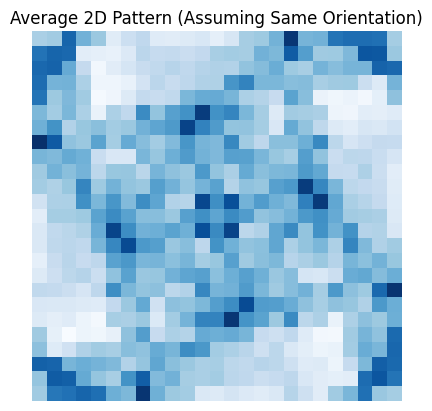

In [23]:

average_pixel_value = np.mean(np.sum(design_matrix, axis=1))
print("Average pattern’s total pixel value:", average_pixel_value)

average_pattern = np.mean(design_matrix, axis=0)
average_pattern_2d = average_pattern.reshape(25, 25)

plt.imshow(average_pattern_2d, cmap='Blues')
plt.title("Average 2D Pattern (Assuming Same Orientation)")
plt.axis('off')
plt.show()

# KMeans clustering

In [28]:
# Run KMeans multiple times and choose the one with best distortia score
best_kmeans = None
best_labels = None
best_distortia = float('inf')

n_runs = 5  # Number of times to run KMeans

for run in range(n_runs):
    kmeans = KMeans(n_clusters=4, init='k-means++', random_state=run).fit(design_matrix)
    labels = kmeans.labels_
    
    # Calculate distortia score
    distortia = 0
    for i in range(4):
        cluster_points = design_matrix[labels == i]
        centroid = kmeans.cluster_centers_[i].reshape(1, -1)
        distortia += np.sum(np.square(cluster_points - centroid))
    
    print(f"Run {run}: Distortia score = {distortia/1000}") # inertia/total(datapoints)
    
    # Determing the best clustering
    if distortia < best_distortia:
        best_kmeans = kmeans
        best_labels = labels
        best_distortia = distortia

print("Best Distortia score:", best_distortia/1000)

orientation_averages = []

for i in range(4):
    class_patterns = design_matrix[best_labels == i]
    average_class_pattern = np.mean(class_patterns, axis=0)
    orientation_averages.append(average_class_pattern)

Run 0: Distortia score = 1482.1780145095945
Run 1: Distortia score = 1481.0640470691696
Run 2: Distortia score = 1482.7315082858381
Run 3: Distortia score = 1482.583423864697
Run 4: Distortia score = 1481.0640041507818
Best Distortia score: 1481.0640041507818


# Visualize the average pattern for each cluster

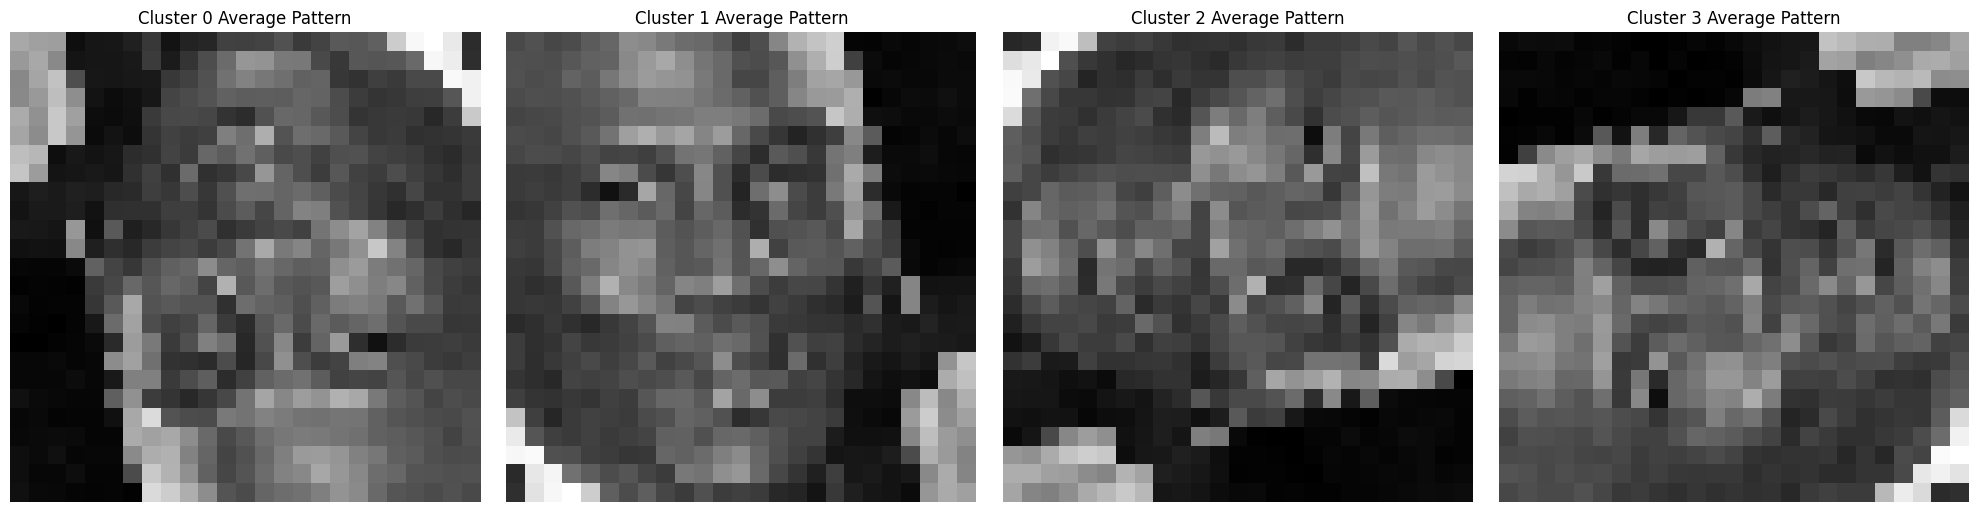

In [30]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, ax in enumerate(axes):
    average_class_pattern_2d = orientation_averages[i].reshape(25, 25)
    ax.imshow(average_class_pattern_2d, cmap='gray')
    ax.set_title(f"Cluster {i} Average Pattern")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Again sorting the clusters

In [33]:
reference_pattern = design_matrix[0].reshape(25, 25)
rotations = [reference_pattern,
             np.rot90(reference_pattern, k=1),
             np.rot90(reference_pattern, k=2),
             np.rot90(reference_pattern, k=3)]

# Calculating Euclidian distances and determine best matching rotation for each cluster
rotation_order = [-1] * 4 
for i, avg in enumerate(orientation_averages):
    avg_2d = avg.reshape(25, 25)
    min_dist = float('inf')
    best_rotation = -1
    for j, rot in enumerate(rotations):
        dist = np.sum((avg_2d - rot) ** 2)
        if dist < min_dist:
            min_dist = dist
            best_rotation = j
    rotation_order[i] = best_rotation
    
# Verify if each rotation (0°, 90°, 180°, 270°) is assigned only once
if len(set(rotation_order)) != 4:
    raise ValueError("Rotation determination failed. Please re-run or adjust the algorithm.")


# Visualize the data

Cluster 0 corresponds to 180° Rotation
Cluster 1 corresponds to 0° Rotation
Cluster 2 corresponds to 270° Rotation
Cluster 3 corresponds to 90° Rotation
0° Rotation: 16342 elements
90° Rotation: 16480 elements
180° Rotation: 16447 elements
270° Rotation: 16266 elements


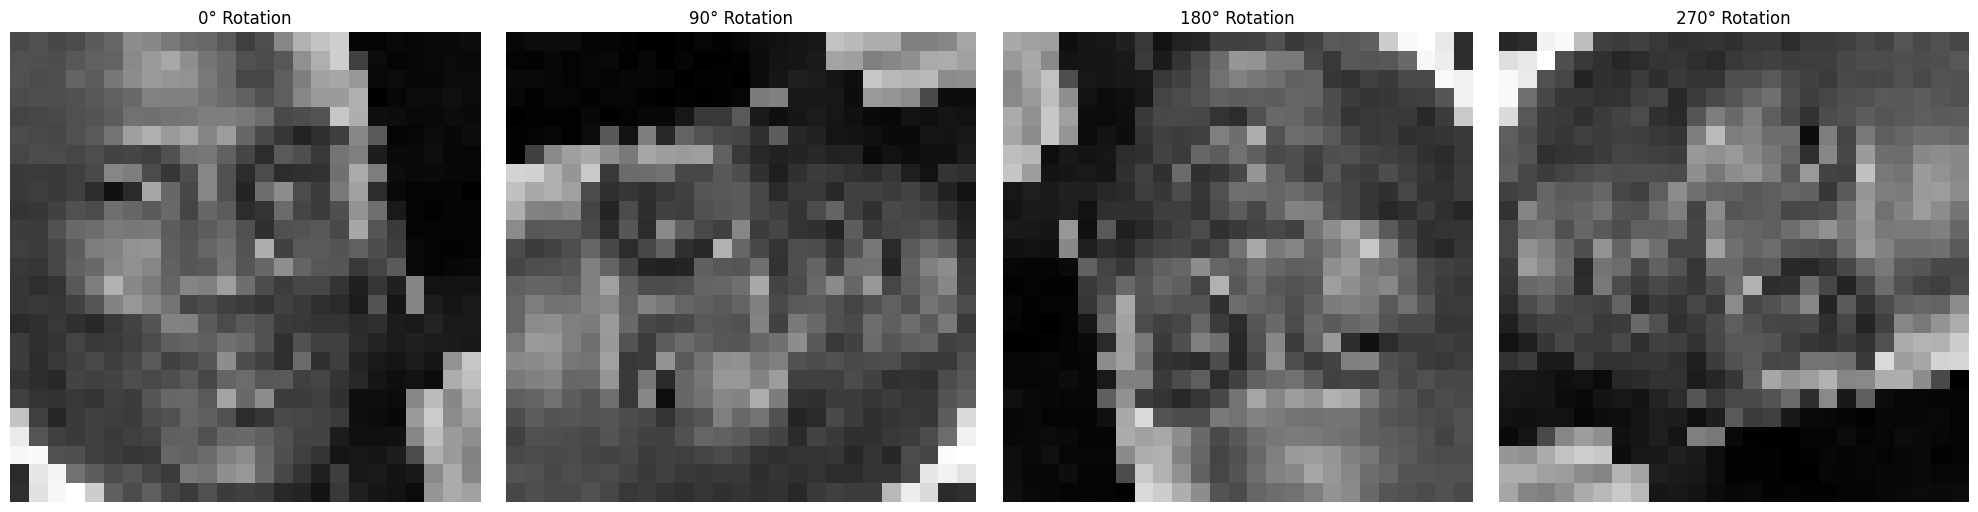

In [37]:
#  Which cluster correspondents to which degree
rotation_titles = ["0° Rotation", "90° Rotation", "180° Rotation", "270° Rotation"]
for i, rotation in enumerate(rotation_order):
    print(f"Cluster {i} corresponds to {rotation_titles[rotation]}")
    
# Number of elements by cluster
cluster_counts = np.bincount(best_labels)
rotation_to_cluster = {rotation_order[i]: i for i in range(4)}
sorted_rotations = sorted(rotation_to_cluster.items())

for rotation, cluster_num in sorted_rotations:
    print(f"{rotation_titles[rotation]}: {cluster_counts[cluster_num]} elements")

# Sorting the clusters
reordered_averages = [orientation_averages[rotation_order.index(i)] for i in range(4)]

# Visualizing average's for each cluster
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axes):
    class_pattern_2d = reordered_averages[i].reshape(25, 25)
    ax.imshow(class_pattern_2d, cmap='gray')
    ax.set_title(rotation_titles[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

# Further thoughts
## 1. Different data
Here we have different data from the forth task. The dataset consists only binary patterns. 
## 2. Average 2D pattern
From the average 2D pattern we could observe that it creates too much noise for the image. Because of that the eye and the mouth of the Morgan Freeman is blurred.
## 3. To improve further the image
a) We could reduce the noise from the center but after trying many different ML algorithms(KMeans, DBSCAN, GMM and etc.), we didn't suceed improving the quality
b) Clearly, we need the function from the fifth task to reduce effectively the noise in the center


# Thank you!